
---
# BIGGEST PREDICTOR OF CO2 OUTPUT
---

```
*#(PART 1/3 OF MAIN REPORT_CO2_EMISSIONS)*
```


pink.png



>  Understanding where our emissions come from could help to see where we should focus our attention.  All the chosen factors are known to be producing most of our emissions, except for one. "Share Of Renewable Energy" is a factor included because I'm curious to see how it is doing today. The data for this analysis is sourced from "Our World In Data" website to calculate the correlation coefficient between our emissions. The mathematical formula is often used to explain how two individual subjects relate to each other. The result will show us what factor or combination of factors have a strong relation with our CO2 output. In this case, what could be the best predictor.



*for more explanation and details see: `REFERENCES`*










---


# Reading In Data

---



In [ ]:
# Default starting template and setting up dataframes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

%load_ext google.colab.data_table

owid_colnames=['Entity', 'Year', 'Co2_Per_Cap', 'GDP', 'Primary_NRG_Use']
get_owid_col=['country', 'year', 'iso_code', 'gdp', 'co2_per_capita', 'primary_energy_consumption']
reorder_owid_col=['country', 'year', 'iso_code', 'co2_per_capita', 'gdp', 'primary_energy_consumption']
get_transport_col=['Entity', 'Year', 'Transport']
food_colnames=['Entity', 'Year', 'Food_Co2']
get_food_col=['Entity', 'Year', 'Food emissions by country']
renew_colnames=['Entity', 'Year', 'Renew_Perc_NRG']
get_renew_col=['Entity','Year', 'Renewables (% equivalent primary energy)']

df = pd.read_csv('https://raw.githubusercontent.com/DASH-OF-GLITTER/CO2_Emissions_Report/main/owid-co2-data.csv', usecols=get_owid_col)[reorder_owid_col]
df_transport = pd.read_csv('https://raw.githubusercontent.com/DASH-OF-GLITTER/CO2_Emissions_Report/main/co2-emissions-transport.csv', usecols=get_transport_col)
df_food = pd.read_csv('https://raw.githubusercontent.com/DASH-OF-GLITTER/CO2_Emissions_Report/main/emissions-from-food.csv',usecols=get_food_col)
df_renewable = pd.read_csv('https://raw.githubusercontent.com/DASH-OF-GLITTER/CO2_Emissions_Report/main/renewable-share-energy.csv',usecols=get_renew_col)


df_f_90 = df.loc[(df['year'] >= 1990)]
df_f_90 = df_f_90.dropna(subset = ['iso_code'])
df_f_90.drop(columns=['iso_code'], inplace=True)
df_f_90.columns = owid_colnames

df_transport_f_90 = df_transport.loc[df_transport['Year'] >= 1990]

df_food_f_90 = df_food.loc[df_food['Year'] >= 1990]
df_food_f_90.columns = food_colnames

df_renewable_f_90 = df_renewable.loc[df_renewable['Year'] >= 1990]
df_renewable_f_90.columns = renew_colnames


df_f_90 = pd.merge(df_f_90, df_transport_f_90, how='left', on=['Entity', 'Year'])
df_f_90 = pd.merge(df_f_90, df_food_f_90, how='left', on=['Entity', 'Year'])
df_f_90 = pd.merge(df_f_90, df_renewable_f_90, how='left', on=['Entity', 'Year'])
df_predictor = df_f_90
display(df_predictor)


Entity  Year  Co2_Per_Cap           GDP  Primary_NRG_Use  \
0     Afghanistan  1990        0.189  1.306598e+10           31.746   
1     Afghanistan  1991        0.178  1.204736e+10           13.903   
2     Afghanistan  1992        0.123  1.267754e+10            9.168   
3     Afghanistan  1993        0.106  9.834581e+09            9.105   
4     Afghanistan  1994        0.094  7.919857e+09            8.816   
...           ...   ...          ...           ...              ...   
7419     Zimbabwe  2017        0.651  2.194784e+10           45.257   
7420     Zimbabwe  2018        0.784  2.271535e+10           51.809   
7421     Zimbabwe  2019        0.724           NaN           46.120   
7422     Zimbabwe  2020        0.677           NaN           41.997   
7423     Zimbabwe  2021        0.706           NaN           42.145   

      Transport    Food_Co2  Renew_Perc_NRG  
0     1670000.0  10442724.8             NaN  
1     1550000.0  10665824.8             NaN  
2      770000.0  10805724.8             NaN  
3      740000.0  11003824.8             NaN  
4      710000.0  11286224.8             NaN  
...         ...         ...             ...  
7419  2240000.0         NaN             NaN  
7420  2870000.0         NaN             NaN  
7421  2560000.0         NaN             NaN  
7422        NaN         NaN             NaN  
7423        NaN         NaN             NaN  

[7424 rows x 8 columns]



---


# Creating Columns - Calculating Correlation And P-value - Populating Columns

---



In [ ]:
# Creating columns to store correlation values
corr_columns = ['Cor_GDP','P_GDP','Cor_Primary_NRG_Use','P_Primary_NRG_Use', 'Cor_Transport', 'P_Transport','Cor_Food_Co2', 'P_Food_Co2', 'Cor_Renew_Perc_NRG', 'P_Renew_Perc_NRG']
for corr in corr_columns:
  df_predictor[corr] = 0

#display(df_predictor)


#Calculate correlation and p_val values
def calculate_corr_pval(c_name,co2,predictor,cor_out, pval_out):
  df_temp = df_predictor.loc[df_predictor['Entity'] == c_name]
  df_temp = df_temp.dropna(subset = [co2, predictor])
  if df_temp['Entity'].count() > 1:

    corr_result = pearsonr(df_temp[co2], df_temp[predictor])[0]
    pval_result = pearsonr(df_temp[co2], df_temp[predictor])[1]

    df_predictor.loc[df_predictor['Entity'] == c_name,cor_out] = corr_result
    df_predictor.loc[df_predictor['Entity'] == c_name,pval_out] = pval_result



list_of_countries = df_predictor['Entity'].unique()
for c in list_of_countries:
    calculate_corr_pval(c,'Co2_Per_Cap','GDP', 'Cor_GDP', 'P_GDP')
    calculate_corr_pval(c,'Co2_Per_Cap','Primary_NRG_Use', 'Cor_Primary_NRG_Use','P_Primary_NRG_Use')
    calculate_corr_pval(c,'Co2_Per_Cap','Transport', 'Cor_Transport', 'P_Transport')
    calculate_corr_pval(c,'Co2_Per_Cap','Food_Co2', 'Cor_Food_Co2','P_Food_Co2')
    calculate_corr_pval(c,'Co2_Per_Cap','Renew_Perc_NRG', 'Cor_Renew_Perc_NRG','P_Renew_Perc_NRG')

#display(df_predictor)


#Grouping data and resetting the index and dropping columns that are no longer needed
group_by_list = ['Entity', 'Cor_GDP', 'P_GDP', 'Cor_Primary_NRG_Use', 'P_Primary_NRG_Use', 'Cor_Transport', 'P_Transport', 'Cor_Food_Co2', 'P_Food_Co2','Cor_Renew_Perc_NRG', 'P_Renew_Perc_NRG']
df_entity_group = df_predictor.groupby(group_by_list).count().reset_index()
df_entity_group.drop(columns=['Year', 'Co2_Per_Cap', 'GDP', 'Primary_NRG_Use', 'Transport','Food_Co2', 'Renew_Perc_NRG'], inplace=True)

cor_sig_add = ['Corr_Sig_GDP','Corr_Sig_NRG_Use','Corr_Sig_Transport','Corr_Sig_Food_Co2', 'Corr_Sig_Renew_Perc_NRG']
for sig in cor_sig_add:
 df_entity_group[sig] = ''

#display(df_entity_group)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))




---


# Defining Strenght Of Correlation

---



In [ ]:
#Defining strength of correlation

def set_correlation_significance(c_name, cor_in, pval_in, sig_output):
  result = ""
  df_temp = df_entity_group.loc[df_entity_group['Entity'] == c_name]
  #print(df_temp)
  pval = df_temp[pval_in].values[0]
  corr = df_temp[cor_in].values[0]

  if pval <= 0.05 and pval != 0:
    if corr >= 0 and corr <= .1:
      result = 'no'
    if (corr > .1 and corr <= .3):
      result = 'weak positive'
    if (corr > .3 and corr <= .5):
      result = 'moderate positive'
    if (corr > .5 and corr <= .7):
      result = 'strong positive'
    if (corr > .7 and corr <= 1):
      result = 'very strong positive'

    if corr <= 0 and corr >= -.1:
      result = 'no'
    if (corr < -.1 and corr >= -.3):
      result = 'weak negative'
    if (corr < -.3 and corr >= -.5):
      result = 'moderate negative'
    if (corr < -.5 and corr >= -.7):
      result = 'strong negative'
    if (corr < -.7 and corr >= -1):
      result = 'very strong negative'

  else:
    result = 'insufficient data'

  df_entity_group.loc[df_entity_group['Entity'] == c_name, sig_output] = result
  #display(df_temp)

list_of_countries = df_entity_group['Entity'].unique()
for c in list_of_countries:
    set_correlation_significance(c,'Cor_GDP', 'P_GDP', 'Corr_Sig_GDP')
    set_correlation_significance(c,'Cor_Primary_NRG_Use','P_Primary_NRG_Use', 'Corr_Sig_NRG_Use')
    set_correlation_significance(c,'Cor_Transport', 'P_Transport', 'Corr_Sig_Transport')
    set_correlation_significance(c,'Cor_Food_Co2','P_Food_Co2', 'Corr_Sig_Food_Co2')
    set_correlation_significance(c,'Cor_Renew_Perc_NRG','P_Renew_Perc_NRG', 'Corr_Sig_Renew_Perc_NRG')

display(df_entity_group)

Entity   Cor_GDP         P_GDP  Cor_Primary_NRG_Use  \
0          Afghanistan  0.861233  2.019366e-09             0.971034   
1        Aland Islands  0.000000  0.000000e+00             0.000000   
2              Albania  0.849329  5.697105e-09             0.846629   
3              Algeria  0.756823  2.025143e-06             0.907157   
4       American Samoa  0.000000  0.000000e+00             0.000000   
..                 ...       ...           ...                  ...   
223  Wallis and Futuna  0.000000  0.000000e+00             0.000000   
224     Western Sahara  0.000000  0.000000e+00             0.000000   
225              Yemen  0.702777  2.130140e-05             0.874246   
226             Zambia  0.523952  3.531138e-03             0.795263   
227           Zimbabwe  0.583708  8.873276e-04             0.769424   

     P_Primary_NRG_Use  Cor_Transport   P_Transport  Cor_Food_Co2  \
0         3.314725e-20       0.968444  1.960200e-18      0.702620   
1         0.000000e+00       0.000000  0.000000e+00      0.000000   
2         1.020247e-09       0.822778  2.410217e-08      0.076285   
3         8.340976e-13       0.845907  3.958089e-09      0.803175   
4         0.000000e+00       0.000000  0.000000e+00      0.000000   
..                 ...            ...           ...           ...   
223       0.000000e+00       0.000000  0.000000e+00      0.294713   
224       0.000000e+00       0.000000  0.000000e+00      0.000000   
225       6.298636e-11       0.807409  6.976655e-08      0.782425   
226       5.389247e-08       0.735519  3.646391e-06      0.220269   
227       2.656854e-07       0.169520  3.704929e-01     -0.141539   

       P_Food_Co2  Cor_Renew_Perc_NRG  P_Renew_Perc_NRG          Corr_Sig_GDP  \
0    6.279889e-05             0.00000          0.000000  very strong positive   
1    0.000000e+00             0.00000          0.000000     insufficient data   
2    7.110913e-01             0.00000          0.000000  very strong positive   
3    7.854824e-07             0.26653          0.140332  very strong positive   
4    0.000000e+00             0.00000          0.000000     insufficient data   
..            ...                 ...               ...                   ...   
223  1.438701e-01             0.00000          0.000000     insufficient data   
224  0.000000e+00             0.00000          0.000000     insufficient data   
225  2.329552e-06             0.00000          0.000000  very strong positive   
226  2.795780e-01             0.00000          0.000000       strong positive   
227  4.903815e-01             0.00000          0.000000       strong positive   

         Corr_Sig_NRG_Use    Corr_Sig_Transport     Corr_Sig_Food_Co2  \
0    very strong positive  very strong positive  very strong positive   
1       insufficient data     insufficient data     insufficient data   
2    very strong positive  very strong positive     insufficient data   
3    very strong positive  very strong positive  very strong positive   
4       insufficient data     insufficient data     insufficient data   
..                    ...                   ...                   ...   
223     insufficient data     insufficient data     insufficient data   
224     insufficient data     insufficient data     insufficient data   
225  very strong positive  very strong positive  very strong positive   
226  very strong positive  very strong positive     insufficient data   
227  very strong positive     insufficient data     insufficient data   

    Corr_Sig_Renew_Perc_NRG  
0         insufficient data  
1         insufficient data  
2         insufficient data  
3         insufficient data  
4         insufficient data  
..                      ...  
223       insufficient data  
224       insufficient data  
225       insufficient data  
226       insufficient data  
227       insufficient data  

[228 rows x 16 columns]



---


# RESULTS

---



In [ ]:
cor_sig_list = ['Corr_Sig_NRG_Use','Corr_Sig_Transport','Corr_Sig_Food_Co2', 'Corr_Sig_GDP', 'Corr_Sig_Renew_Perc_NRG']
for sig in cor_sig_list:
  print(sig)
  print(df_entity_group[sig].value_counts(ascending=False)[:])
  print('_________________________________')

best_predictor = df_entity_group['Corr_Sig_NRG_Use'].value_counts(ascending=False)[:]




Corr_Sig_NRG_Use
very strong positive    126
insufficient data        52
strong positive          19
moderate positive        18
moderate negative         5
strong negative           5
very strong negative      3
Name: Corr_Sig_NRG_Use, dtype: int64
_________________________________
Corr_Sig_Transport
very strong positive    97
insufficient data       82
strong positive         25
moderate positive        8
strong negative          7
moderate negative        5
very strong negative     4
Name: Corr_Sig_Transport, dtype: int64
_________________________________
Corr_Sig_Food_Co2
insufficient data       89
very strong positive    71
strong positive         37
very strong negative    10
moderate positive        8
strong negative          7
moderate negative        6
Name: Corr_Sig_Food_Co2, dtype: int64
_________________________________
Corr_Sig_GDP
insufficient data       103
very strong positive     79
very strong negative     19
strong positive          13
moderate positive         6
mod

The biggest predictor when it comes to CO2 emissions based on my research is "Primary Energy Use". This includes all the daily energy use such as heating our homes, cooking, lights, .... This predictor is a larger factor in more developed countries and does not appear to be well tracked in most underdeveloped countries. The trend for "Primary Energy Use" as a predictor shows that as our energy consumption goes up so does CO2 emissions. Now this seems like it would be obvious, but there are countries that are beating this trend.

Many of the countries that are lowering CO2 emissions even though "Primary Energy Use" may be climbing are often countries with the highest GDPs which at one time was another good predictor of CO2 emissions. Now those countries are investing in renewable energy solutions which allow for alternative energy supplies. While "Primary Energy Use" is the best predictor for developed countries it does not work for everyone.

Countries that would be considered underdeveloped at this time would see better indicators from land use change and forestry or the amount of agriculture. But until everyone is at the same levels of development "Primary Energy Use" is our best predictor. There are several other predictors that could also be used to get the same indication of CO2 emissions by a country; at this time those would be transportation and food systems.

In the chart below you will see the number of countries that have a strong correlation between their "Primary Energy Use" and the amount of CO2 emissions they produce. This does not take any factors into consideration; it is just the correlation that if "Primary Energy Use" goes up that the countries CO2 emissions with rise as well. See chart A below.






---


# Creating Pie Charts Both Incl. And Excl. Insufficient Data

---



In [ ]:
#Setting up data for pie charts A and B
best_predictor_all = df_entity_group['Corr_Sig_NRG_Use'].value_counts(ascending=False).reset_index().rename(columns={"index": "corr", 0: "count"})
best_predictor_all = best_predictor_all[best_predictor_all['corr'].str.contains('insufficient')==False]
y_total_data = 'Total Countries w/ sufficient data: {}'.format(best_predictor_all.Corr_Sig_NRG_Use.sum())
y_total_data_in = 'Total Countries w/ insufficient data: {}'.format(best_predictor.sum())


---


# **> CHART A**

Percentage of Correlation Significance between "Energy Use" and its CO2 output per capita

*Excluding insufficient data*

---


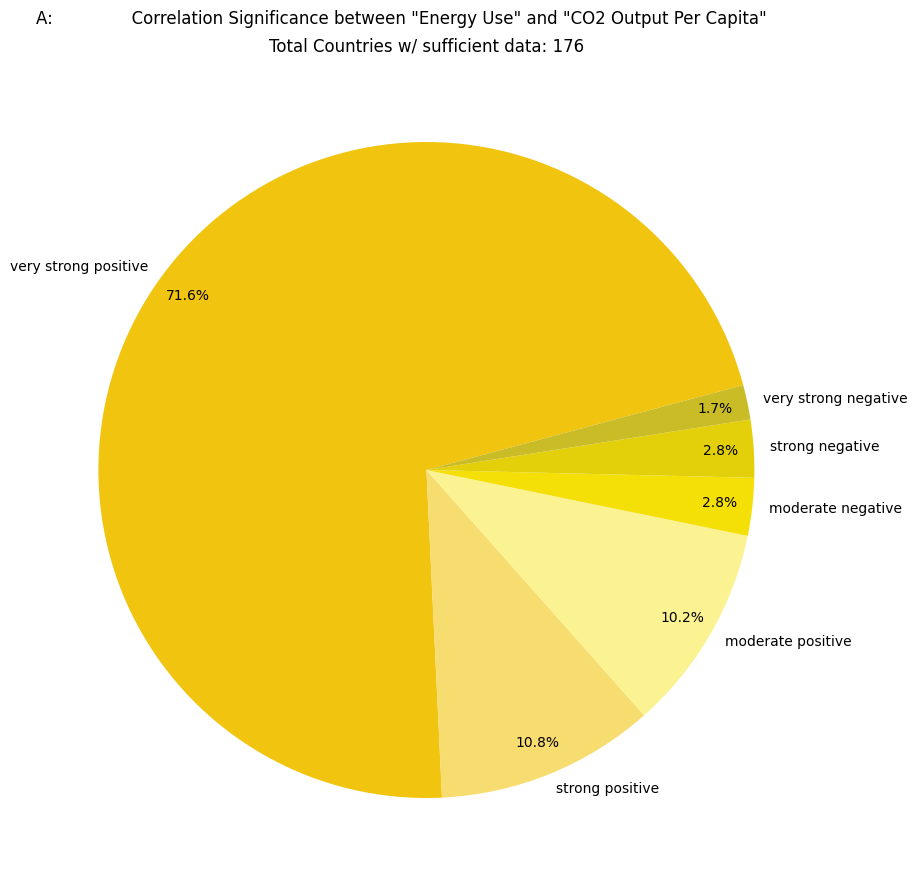

In [ ]:
best_predictor_all.plot.pie(y='Corr_Sig_NRG_Use',legend=None,  title=[y_total_data], ylabel='', labels=best_predictor_all['corr'], subplots=True,autopct="%.1f%%", pctdistance=0.9, labeldistance=1.05,startangle=15,figsize=(20,10),colors=["#F1C40F", "#F7DC6F", "#FBF292", "#F4DF06", "#E4D00A", "#CABC26", "#EBD811"])
plt.suptitle('A:               Correlation Significance between "Energy Use" and "CO2 Output Per Capita"')
plt.subplots_adjust(top=0.93)#Adjust Space between the Sup (top)Title and the Title below.
plt.show()


---


# **> CHART B**

Percentage of Correlation Significance between "Energy Use" and its CO2 output per capita

*Including insufficient data*

---


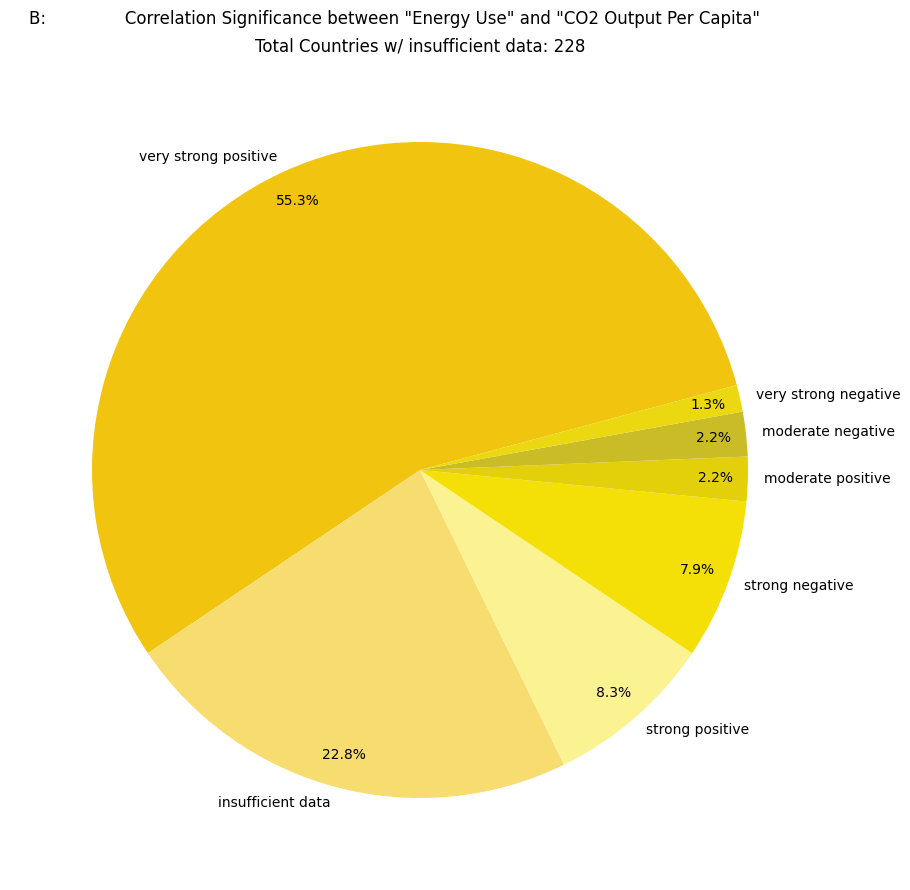

In [ ]:
best_predictor.plot.pie(title=[y_total_data_in], ylabel='', labels=['very strong positive', 'insufficient data', 'strong positive', 'strong negative','moderate positive', 'moderate negative', 'very strong negative'], subplots=True,autopct="%.1f%%", pctdistance=0.9, labeldistance=1.05,startangle=15,figsize=(20,10),colors=["#F1C40F", "#F7DC6F", "#FBF292", "#F4DF06", "#E4D00A", "#CABC26", "#EBD811", "#F4E651"])
plt.suptitle('B:               Correlation Significance between "Energy Use" and "CO2 Output Per Capita"')
plt.subplots_adjust(top=0.93)#Adjust Space between the Sup (top)Title and the Title below.
plt.show()



---


# CONCLUSION

---



What is the biggest predictor for a larger CO2 output per capita?

Since most of our primary energy today is sourced from Fossil Fuels that create high CO2 emissions. The better we are doing. The more energy we tend to use. The more CO2 we emit.

For now, "Energy Use" is the strongest predictor for a larger CO2 output per capita. As soon as more countries make the switch to renewables. This predictor will lose its strength.

Unfortunately, this is mostly possible for developed Countries. For global growth, we need to invest and help the underdeveloped parts of the world to thrive with Renewables.



---


# SOURCES

---





```
  # PREDICTOR CO2 SOURCES

  CO2_DATA
    Sourced from OWID: https://github.com/owid/co2-data/blob/master/README.md on okt 2023 for this report.
    Used: GDP, co2_per_capita, primary_energy_consumption.

  FOOD_EMISSIONS_BY_COUNTRY
    Sourced from OWID: https://ourworldindata.org/grapher/emissions-from-food?tab=table on okt 2023 for this report.
      OWID sourced  from: https://www.nature.com/articles/s43016-021-00225-9
      Data published by Crippa, M., Solazzo, E., Guizzardi, D. et al.
      Food systems are responsible for a third of global anthropogenic GHG emissions. Nature Food (2021).

  EMISSIONS_BY_TRANSPORT
    Sourced from OWID: https://ourworldindata.org/grapher/per-capita-co2-transport  on okt 2023 for this report.
      OWID sourced from: https://www.climatewatchdata.org/data-explorer/historical-emissions
      Data published by CAIT Climate Data Explorer via Climate Watch.
      Retrieved by OWID 2022-08-10

  RENEWABLES_SHARE_OF_ENERGY
    Sourced from OWID: https://ourworldindata.org/grapher/renewable-share-energy?tab=chart on okt 2023 for this report.
      OWID sourced from: https://www.energyinst.org/statistical-review/
      Retrieved by OWID 2023-06-27
      Data published by Energy Institute Statistical Review of World Energy (2023)


```





```
Correlation coefficient formula from: https://www.statisticshowto.com
```




---


# REFERENCES

---



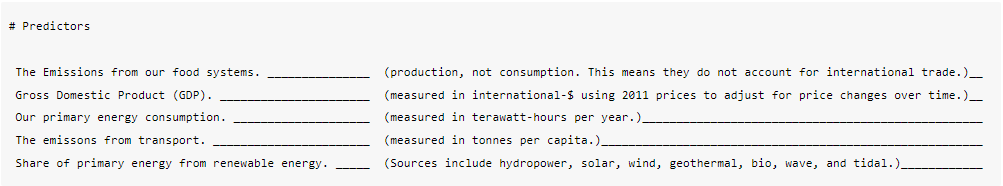

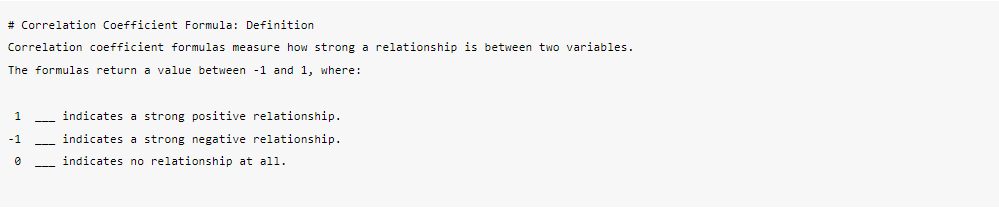

```
# Defined in this dataset: The strength of the correlation
 r between  0 & .1 = 'no'___________________________  r between  0 & -.1  = 'no'___________________________
 r between .1 & .3 = 'weak positive'________________  r between -.1 & -.3 = 'weak negative'________________
 r between .3 & .5 = 'moderate positive'____________  r between -.3 & -.5 = 'moderate negative'____________
 r between .5 & .7 = 'strong positive'______________  r between -.5 & -.7 = 'strong negative'______________
 r between .7 &  1 = 'very strong positive'_________  r between -.7 & -1  = 'very strong negative'_________
```
*Naming Note: The strength of the correlation is defined differently amongst researchers. Words such as strong, perfect or good etc can be chosen to define the strength of the relationship. However, it is unclear where a good relationship turns into a strong one. As the same strength of r might be defined differently by someone else.*


```
# Defined in this dataset: The p value threshold
 p starting from 0.05 = 'insufficient data'_______________________________________________________________
```
*P-Value Note: The p-value can be perceived as a threshold that defines our results. If the p-value is 0.05 or higher, the result is seen as insignificant. However we can choose to move the threshold value closer to 0.01 (1%).*



pink.png